<a href="https://colab.research.google.com/github/Falconly/Machine_learning/blob/main/Linear_Regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_dataset = '/content/drive/MyDrive/dataset.csv'
data = pd.read_csv(path_dataset, sep=';')

In [ ]:
data

,№ хозяйства,"Качество почв, балл (x)","Урожайность от пшеницы, т/га (y)"
0,1,65,2
1,2,80,3
2,3,55,"1,5"
3,4,45,"1,5"
4,5,88,"3,5"
5,6,88,"3,5"
6,7,90,"3,5"
7,8,78,"2,5"
8,9,65,2
9,10,70,2


In [ ]:
data.drop(columns=['№ хозяйства'], inplace=True)

In [ ]:
data.columns = ['x', 'y']

In [ ]:
data['y'] = np.char.replace(data['y'].values.astype(str), ',', '.').astype(np.float32)

<Axes: xlabel='x', ylabel='y'>

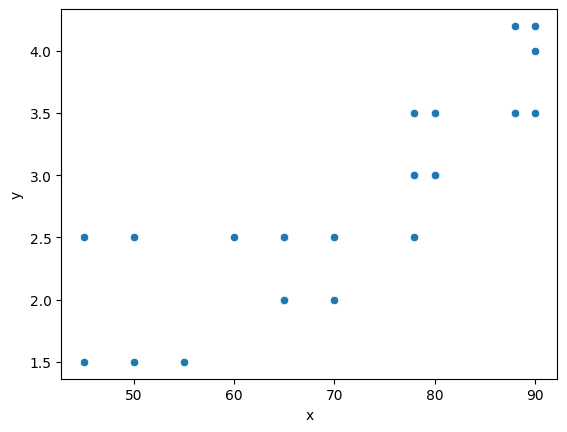

In [ ]:
sns.scatterplot(data, x='x', y='y')

In [ ]:
def mean_squared_error(y, y_pred):
  return np.mean(np.square(y - y_pred))

## Частные производные коэффициентов $b_0$ и $b_1$:
$\frac {∂J}{∂b_0} = $

In [ ]:
def derivate_b1(y, b1, x, b0, n):
  return np.sum((y - b1 * x - b0) * (-x)) / n

def derivate_b0(y, b1, x, b0, n):
  return np.sum(-(y-b1*x-b0)) / n

In [ ]:
b0 = 0
b1 = 0

lr = 0.0001
epochs = 100
batch = 4

In [ ]:
X = data['x'].values
y = data['y'].values

In [ ]:

error_lst = []
b0_lst = []
b1_lst = []

In [ ]:

for i in range(epochs):
  pred = b0 + b1 * X

  error_lst.append(mean_squared_error(pred, y))

  b0_lst.append(b0)
  b1_lst.append(b1)

  b0 = b0 - lr * derivate_b0(y, b1, X, b0, X.shape[0])
  b1 = b1 - lr * derivate_b1(y, b1, X, b0, X.shape[0])

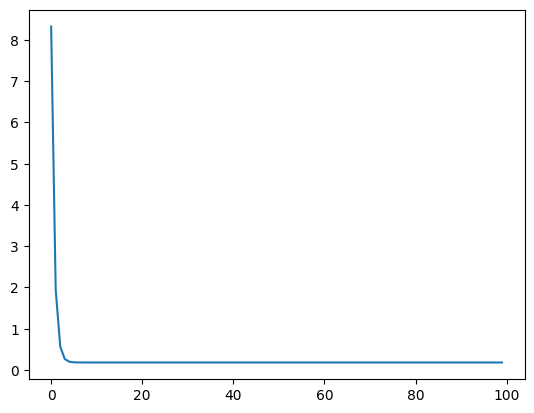

In [ ]:

plt.plot(range(len(error_lst)), error_lst)

In [ ]:

b1

0.03904214245290838

In [ ]:
b0

0.0002895616031490135

In [ ]:
error_lst

[8.325999893188479,
 1.9482429579779423,
 0.5647716665325825,
 0.264667651279893,
 0.19956891500626636,
 0.18544768631590847,
 0.18238448325164544,
 0.18171996023460552,
 0.18157574209695357,
 0.18154437974243437,
 0.18153749378736234,
 0.18153591521746787,
 0.18153548696843372,
 0.18153530779948682,
 0.18153518245244185]